In [1]:
import copy 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split
from statistics import mean 

data: pd.DataFrame = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv')
original_data = copy.deepcopy(data)
target = 'DEATH_EVENT'
positive = 'positive'
negative = 'negative'
print(data[target].value_counts())
values = {'Original': [len(data[data[target] == positive]), len(data[data[target] == negative])]}
y: np.ndarray = data.pop(target).values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)

0    203
1     96
Name: DEATH_EVENT, dtype: int64


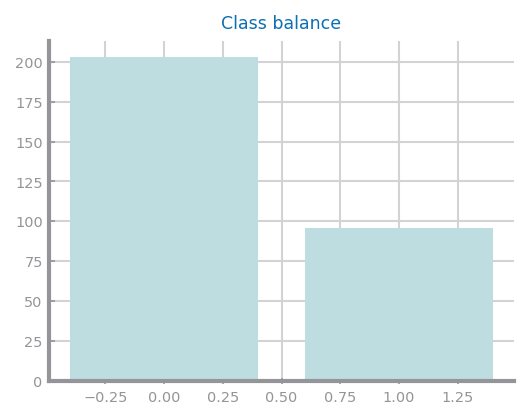

IS_TOXIC = Positive Minority class: 96
IS_TOXIC = Negative Majority class: 203
Proportion: 0.47 : 1


In [2]:
target_count = original_data[target].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('IS_TOXIC = Positive Minority class:', target_count[ind_min_class])
print('IS_TOXIC = Negative Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

Given the prior proportion, we consider that a Data Balancing Technique is needed.

# Unbalanced Naive Bayes

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.naive_bayes import *
import ds_functions as ds
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


data: pd.DataFrame = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv')
y: np.ndarray = data.pop(target).values
X: np.ndarray = data.values
labels = pd.unique(y)

# Preparing data for balancing

In [4]:
data: pd.DataFrame = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv')

In [5]:
import random
def balancing(trnX, trnY, undersample, oversample):
    #undersample, oversample = 1,0 => undersample
    #undersample, oversample = 0,1 => oversample
    unique, counts = np.unique(trnY, return_counts=True)
    
    min_positive_counts = min(counts)
    min_negative_counts = max(counts)+(min(counts)-max(counts))*undersample
    newtrnY: np.ndarray = []
    newtrnX: np.ndarray = []
    for idx in range(len(trnY)):
        if min_positive_counts > 0 and trnY[idx] == 1:
            newtrnY.append(trnY[idx])
            newtrnX.append(trnX[idx])
            min_positive_counts -= 1
        elif min_negative_counts > 0 and trnY[idx] == 0:
            newtrnY.append(trnY[idx])
            newtrnX.append(trnX[idx])
            min_negative_counts -= 1
            
    unique1, counts1 = np.unique(newtrnY, return_counts=True)
    
    max_positive_counts = min(counts1)+(max(counts1)-min(counts1))*oversample
    max_negative_counts = max(counts1)
    finaltrnY: np.ndarray = []
    finaltrnX: np.ndarray = []
    negX: np.ndarray = []
    posX: np.ndarray = []
    negY: np.ndarray = []
    posY: np.ndarray = []
        
    for idx in range(len(newtrnY)):
        if newtrnY[idx] == 0:
            finaltrnY.append(newtrnY[idx])
            negY.append(newtrnY[idx])
            finaltrnX.append(newtrnX[idx])
            negX.append(newtrnX[idx])
            max_negative_counts -= 1
        elif newtrnY[idx] == 1:
            finaltrnY.append(newtrnY[idx])
            posY.append(newtrnY[idx])
            finaltrnX.append(newtrnX[idx])
            posX.append(newtrnX[idx])
            max_positive_counts -= 1

    random.seed()

    while max_negative_counts > 0:
        rand_num = random.randint(0,len(negX)-1)
        finaltrnX.append(negX[rand_num])
        finaltrnY.append(negY[rand_num])
        max_negative_counts -= 1

    while max_positive_counts > 0:
        rand_num = random.randint(0,len(posX)-1)
        finaltrnX.append(posX[rand_num])
        finaltrnY.append(posY[rand_num])
        max_positive_counts -= 1
    
    return finaltrnX, finaltrnY
    

In [134]:
import random
def split_balanced(X,y,train_size):
    X = X.tolist()
    y = y.tolist()
    random.seed()
    trn_size = len(X)*train_size
    tstX = []
    tstY = []
    trnX = []
    trnY = []
    while len(trnX)<trn_size:
        rand_num = random.randint(0,len(X)-1)
        trnX.append(X.pop(rand_num))
        trnY.append(y.pop(rand_num))
   
    y_01 = [[],[]]
    for ix in range(len(y)):
        y_01[y[ix]].append(X[ix])
    
    while len(y_01[0]) != 0 and len(y_01[1]) != 0:
        rand_num_0 = random.randint(0,len(y_01[0])-1)
        rand_num_1 = random.randint(0,len(y_01[1])-1)
        tstX.append(y_01[0].pop(rand_num_0))
        tstY.append(0)
        tstX.append(y_01[1].pop(rand_num_1))
        tstY.append(1)
        
    for ix in range(len(y_01[0])):
        trnX.append(y_01[0][ix])
        trnY.append(0)
        
    for ix in range(len(y_01[1])):
        trnX.append(y_01[1][ix])
        trnY.append(1)
        
    return trnX, tstX, trnY, tstY

# SMOTE Naive Bayes

In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

## Multinomial

Confusion Matrix Test
TruePositives:  1372
FalsePositives:  741
TrueNegatives:  2108
FalseNegatives:  1477


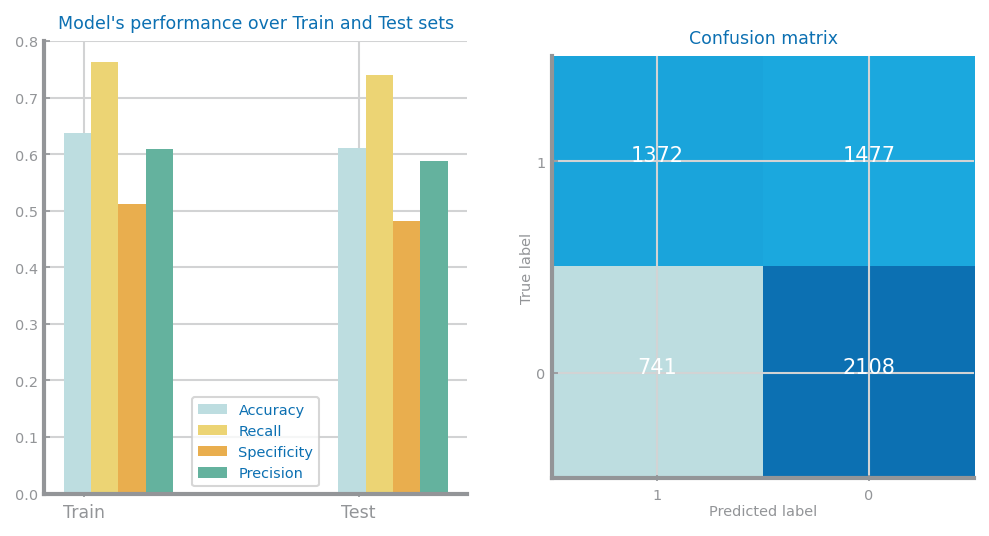

In [98]:
clf = MultinomialNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    smote_X, smote_y = smote.fit_sample(trnX, trnY)
    clf.fit(smote_X, smote_y)
    for yi in smote_y:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    prd_trn = clf.predict(smote_X)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)

ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

## Gaussian

Confusion Matrix Test
TruePositives:  2106
FalsePositives:  568
TrueNegatives:  2262
FalseNegatives:  724


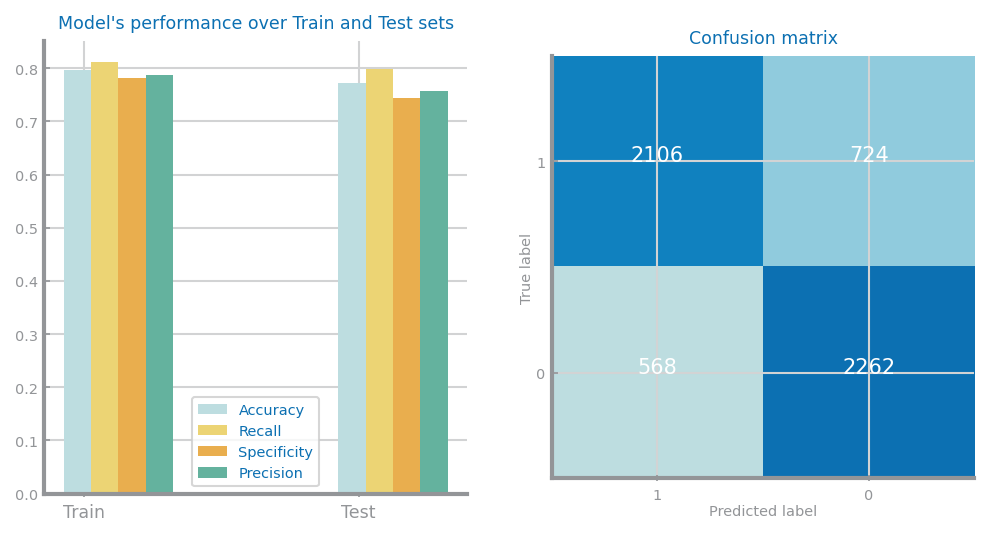

In [100]:
clf = GaussianNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    smote_X, smote_y = smote.fit_sample(trnX, trnY)
    clf.fit(smote_X, smote_y)
    for yi in smote_y:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    prd_trn = clf.predict(smote_X)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)

ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

## Bernoulli

Confusion Matrix Test
TruePositives:  1046
FalsePositives:  948
TrueNegatives:  1886
FalseNegatives:  1788


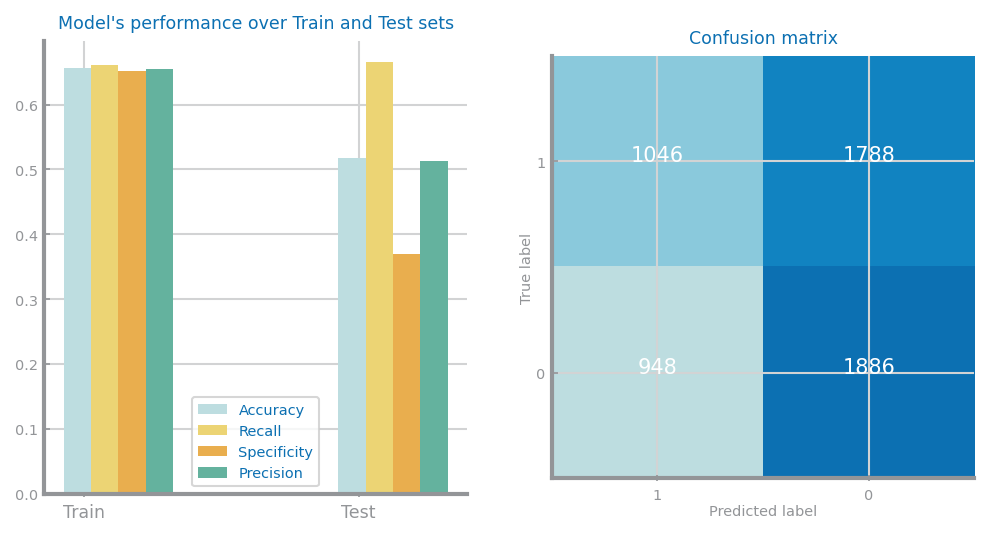

In [102]:
clf = BernoulliNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    smote_X, smote_y = smote.fit_sample(trnX, trnY)
    clf.fit(smote_X, smote_y)
    for yi in smote_y:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    prd_trn = clf.predict(smote_X)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)

ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

With **SMOTE balancing**:
    -  Multinomial Naive Bayes
        -  Accuracy: 61% | Recall: 74% | Specificity: 48% | Precision: 59%
    -  Gaussian Naive Bayes
        -  Accuracy: 77% | Recall: 80% | Specificity: 74% | Precision: 76%
    -  Bernoulli Naive Bayes (almost as bad as choosing randomly)
        -  Accuracy: 52% | Recall: 67% | Specificity: 37% | Precision: 51%
**Gaussian NB not only got the best accuracy with SMOTE but also got the most balanced results, with an F1-Score of: 78%**

# Scaling

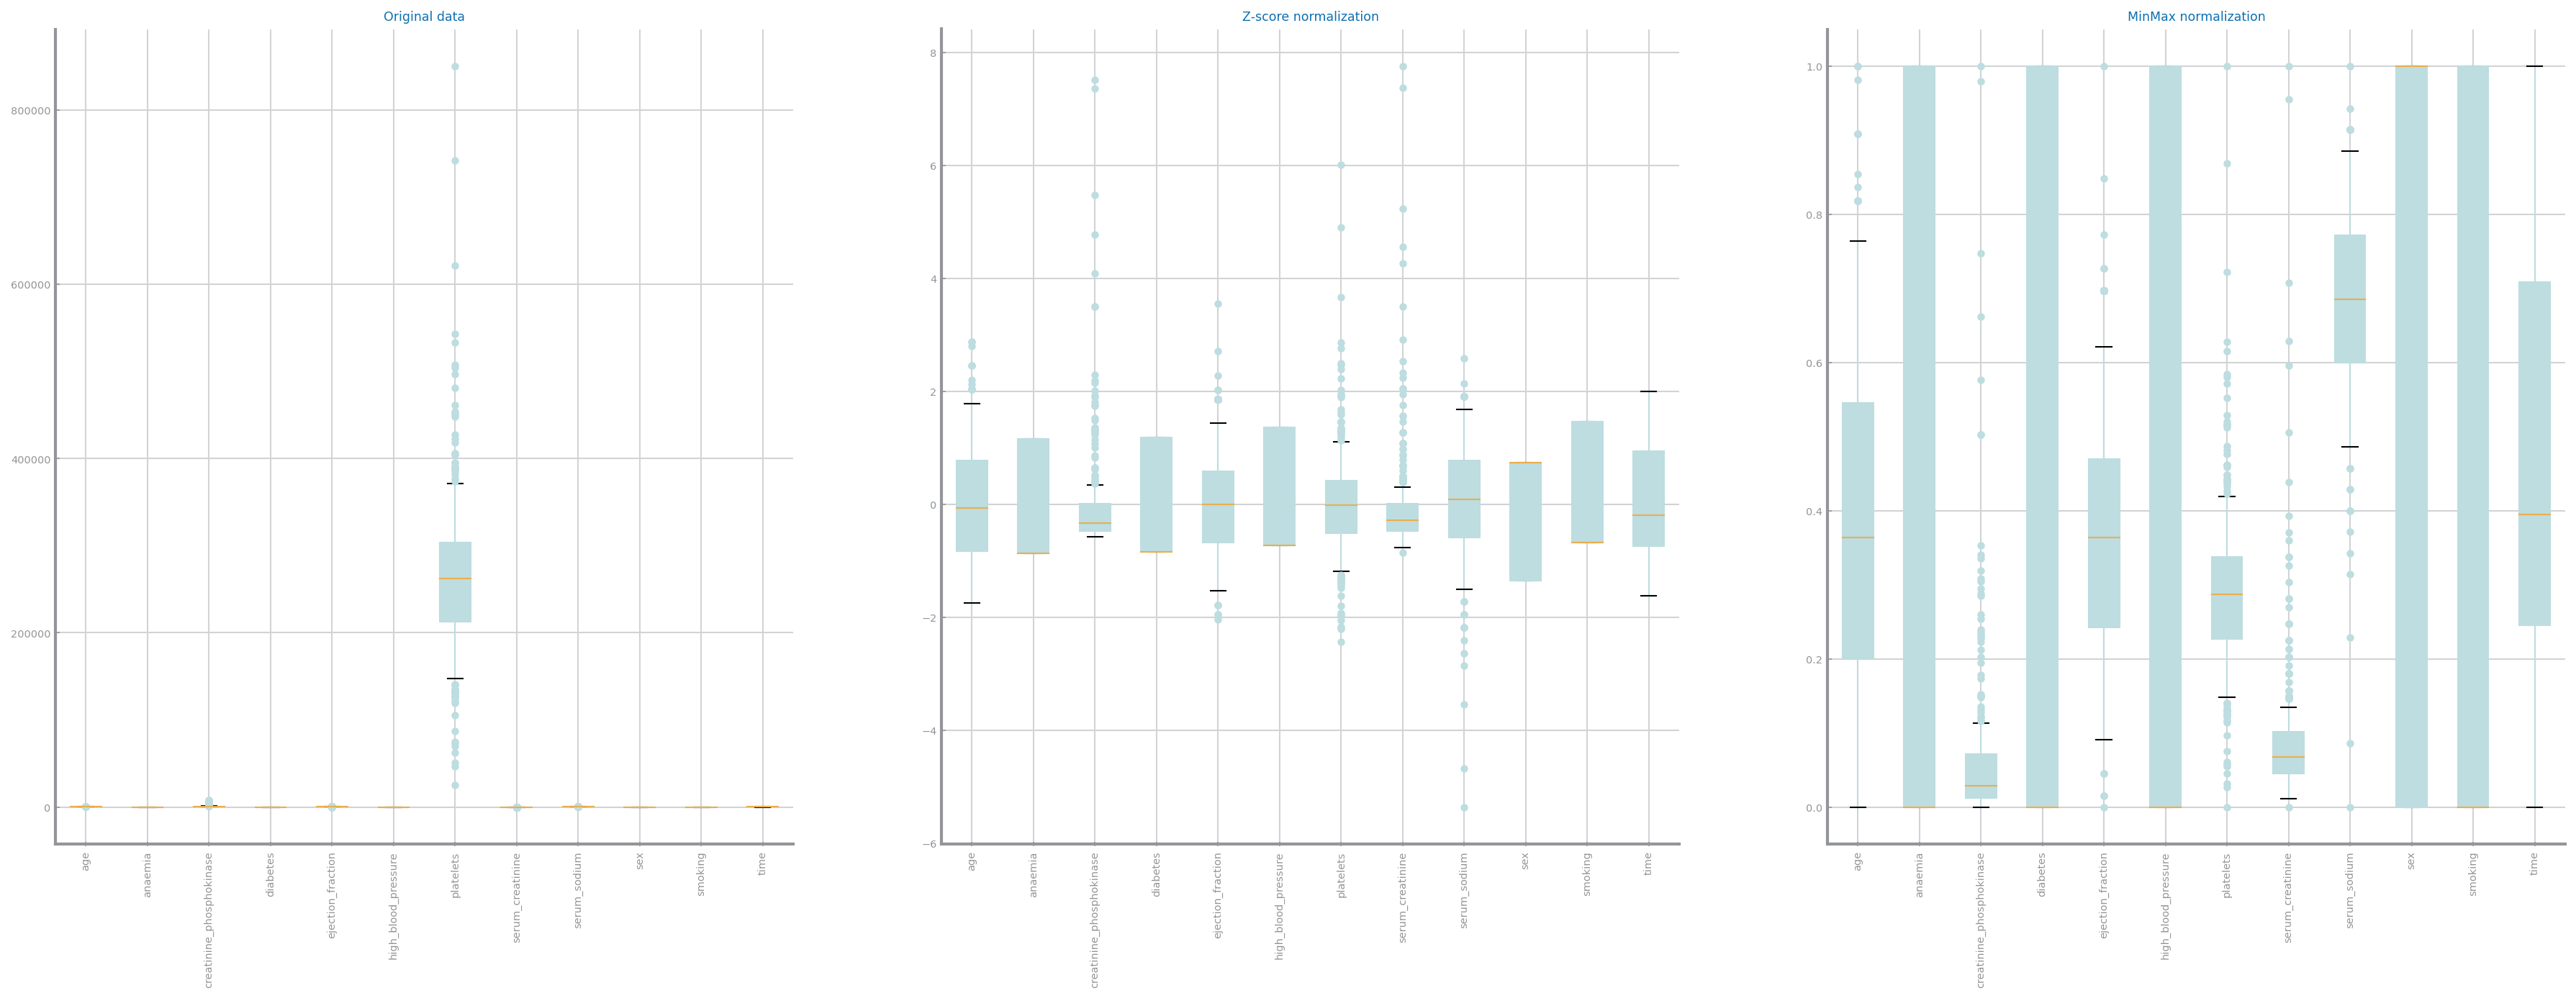

In [119]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(data)
df_nr = pd.DataFrame(transf.transform(data), columns= data.columns)
norm_data_zscore = df_nr
norm_data_zscore.describe(include='all')

transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_nr)
df_nr = pd.DataFrame(transf.transform(df_nr), columns= df_nr.columns)
norm_data_minmax = df_nr
norm_data_minmax.describe(include='all')

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(30,10),squeeze=False )
axs[0, 0].set_title('Original data')
data.boxplot(ax=axs[0, 0])
axs[0, 1].set_title('Z-score normalization')
norm_data_zscore.boxplot(ax=axs[0, 1])
axs[0, 2].set_title('MinMax normalization')
# axs[0, 2].xticks(rotation=90)
norm_data_minmax.boxplot(ax=axs[0, 2])
# fig.tight_layout()
for i in range(3):
    plt.setp(axs[0, i].xaxis.get_majorticklabels(), rotation=90)
    
plt.show()

In [120]:
Xz: np.ndarray = norm_data_zscore.values
XmM : np.ndarray = norm_data_minmax.values

## Multinomial

1.0 1.0
Confusion Matrix Test
TruePositives:  1967
FalsePositives:  732
TrueNegatives:  2137
FalseNegatives:  902


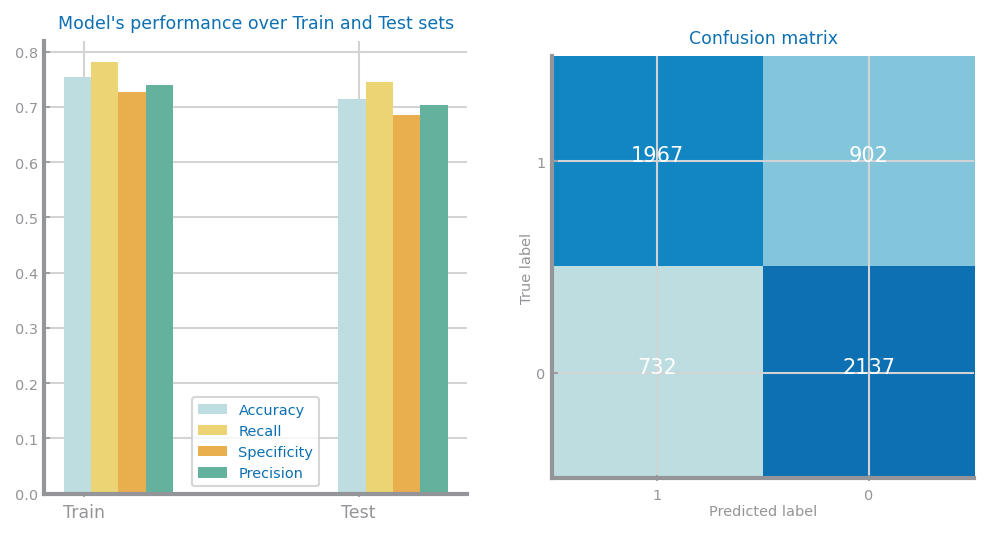

In [17]:
undersample_range = [x*0.1 for x in range(11)]
oversample_range = [x*0.1 for x in range(11)]
clf = MultinomialNB()
best = [[],[],[],[]]
best_acc = 0
under_fact = 0
over_fact = 0
for undersample in undersample_range:
    for oversample in oversample_range:
        total=[0,0,0,0]
        total_trnY = []
        total_tstY = []
        total_prd_trn = []
        total_prd_tst = []
        for ix in range(100):
            trnX, tstX, trnY, tstY = split_balanced(XmM, y, 0.7)
            balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
            for yi in balanceY:
                total_trnY.append(yi)
            for yi in tstY:
                total_tstY.append(yi)
            clf.fit(balanceX, balanceY)
            prd_trn = clf.predict(balanceX)
            prd_tst = clf.predict(tstX)
            for prdi in prd_trn:
                total_prd_trn.append(prdi)
            for prdi in prd_tst:
                total_prd_tst.append(prdi)
            cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
            tn, fp, fn, tp = cnf_mtx_tst.ravel()
            total[0]+=tp
            total[1]+=tn
            total[2]+=fp
            total[3]+=fn


        avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

        if avg_scores > best_acc:
            best[0] = copy.deepcopy(total_trnY)
            best[1] = copy.deepcopy(total_tstY)
            best[2] = copy.deepcopy(total_prd_trn)
            best[3] = copy.deepcopy(total_prd_tst)
            under_fact = undersample
            over_fact = oversample
            best_acc = avg_scores

print(under_fact,over_fact)
ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

## Gaussian

0.4 1.0
Confusion Matrix Test
TruePositives:  1834
FalsePositives:  367
TrueNegatives:  2468
FalseNegatives:  1001


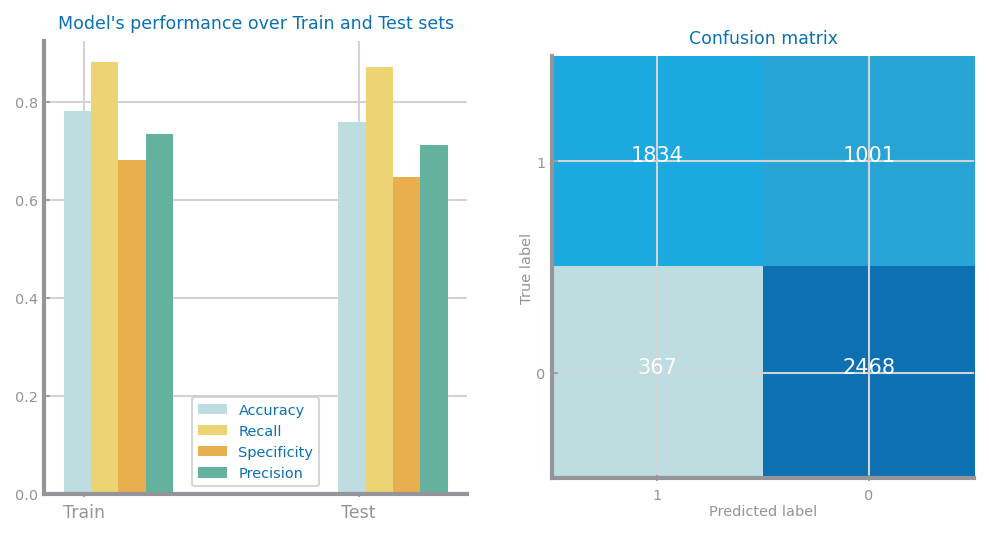

In [18]:
undersample_range = [x*0.1 for x in range(11)]
oversample_range = [x*0.1 for x in range(11)]
clf = GaussianNB()
best = [[],[],[],[]]
best_acc = 0
under_fact = 0
over_fact = 0
for undersample in undersample_range:
    for oversample in oversample_range:
        total=[0,0,0,0]
        total_trnY = []
        total_tstY = []
        total_prd_trn = []
        total_prd_tst = []
        for ix in range(100):
            trnX, tstX, trnY, tstY = split_balanced(XmM, y, 0.7)
            balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
            for yi in balanceY:
                total_trnY.append(yi)
            for yi in tstY:
                total_tstY.append(yi)
            clf.fit(balanceX, balanceY)
            prd_trn = clf.predict(balanceX)
            prd_tst = clf.predict(tstX)
            for prdi in prd_trn:
                total_prd_trn.append(prdi)
            for prdi in prd_tst:
                total_prd_tst.append(prdi)
            cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
            tn, fp, fn, tp = cnf_mtx_tst.ravel()
            total[0]+=tp
            total[1]+=tn
            total[2]+=fp
            total[3]+=fn


        avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

        if avg_scores > best_acc:
            best[0] = copy.deepcopy(total_trnY)
            best[1] = copy.deepcopy(total_tstY)
            best[2] = copy.deepcopy(total_prd_trn)
            best[3] = copy.deepcopy(total_prd_tst)
            under_fact = undersample
            over_fact = oversample
            best_acc = avg_scores

print(under_fact,over_fact)
ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

1.0 0.8
Confusion Matrix Test
TruePositives:  1806
FalsePositives:  397
TrueNegatives:  2406
FalseNegatives:  997


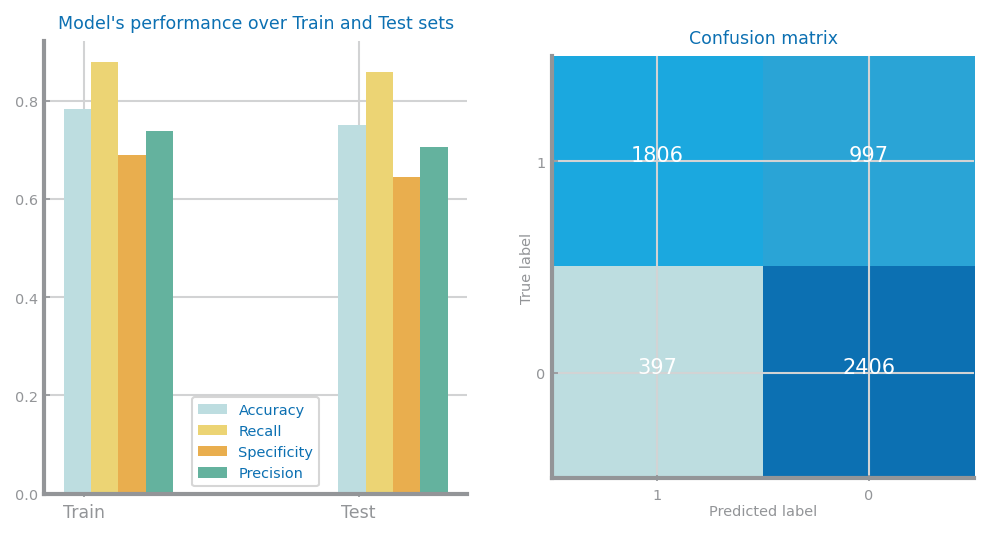

In [19]:
undersample_range = [x*0.1 for x in range(11)]
oversample_range = [x*0.1 for x in range(11)]
clf = GaussianNB()
best = [[],[],[],[]]
best_acc = 0
under_fact = 0
over_fact = 0
for undersample in undersample_range:
    for oversample in oversample_range:
        total=[0,0,0,0]
        total_trnY = []
        total_tstY = []
        total_prd_trn = []
        total_prd_tst = []
        for ix in range(100):
            trnX, tstX, trnY, tstY = split_balanced(Xz, y, 0.7)
            balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
            for yi in balanceY:
                total_trnY.append(yi)
            for yi in tstY:
                total_tstY.append(yi)
            clf.fit(balanceX, balanceY)
            prd_trn = clf.predict(balanceX)
            prd_tst = clf.predict(tstX)
            for prdi in prd_trn:
                total_prd_trn.append(prdi)
            for prdi in prd_tst:
                total_prd_tst.append(prdi)
            cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
            tn, fp, fn, tp = cnf_mtx_tst.ravel()
            total[0]+=tp
            total[1]+=tn
            total[2]+=fp
            total[3]+=fn


        avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

        if avg_scores > best_acc:
            best[0] = copy.deepcopy(total_trnY)
            best[1] = copy.deepcopy(total_tstY)
            best[2] = copy.deepcopy(total_prd_trn)
            best[3] = copy.deepcopy(total_prd_tst)
            under_fact = undersample
            over_fact = oversample
            best_acc = avg_scores

print(under_fact,over_fact)
ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

## Bernoulli

0.4 0.1
Confusion Matrix Test
TruePositives:  98
FalsePositives:  83
TrueNegatives:  2734
FalseNegatives:  2719


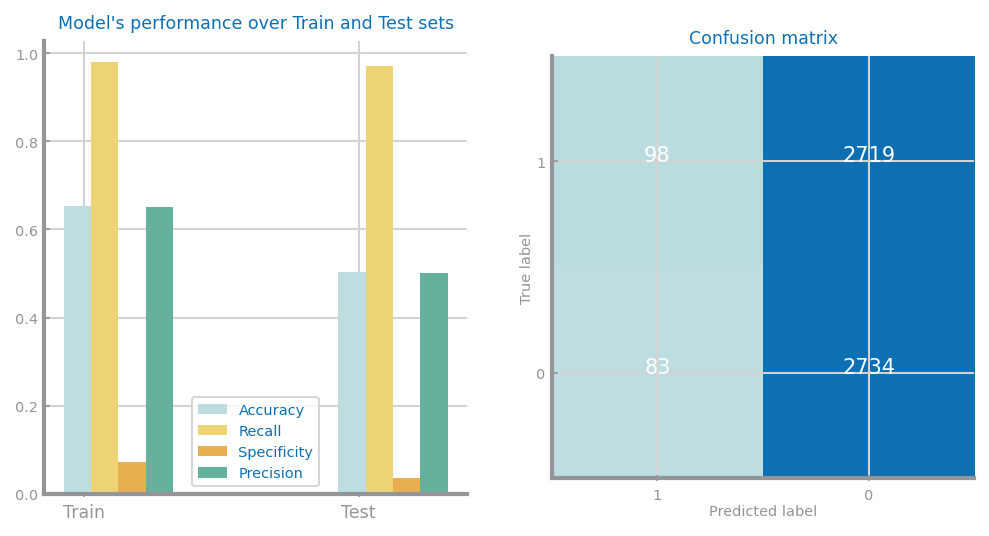

In [20]:
undersample_range = [x*0.1 for x in range(11)]
oversample_range = [x*0.1 for x in range(11)]
clf = BernoulliNB()
best = [[],[],[],[]]
best_acc = 0
under_fact = 0
over_fact = 0
for undersample in undersample_range:
    for oversample in oversample_range:
        total=[0,0,0,0]
        total_trnY = []
        total_tstY = []
        total_prd_trn = []
        total_prd_tst = []
        for ix in range(100):
            trnX, tstX, trnY, tstY = split_balanced(XmM, y, 0.7)
            balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
            for yi in balanceY:
                total_trnY.append(yi)
            for yi in tstY:
                total_tstY.append(yi)
            clf.fit(balanceX, balanceY)
            prd_trn = clf.predict(balanceX)
            prd_tst = clf.predict(tstX)
            for prdi in prd_trn:
                total_prd_trn.append(prdi)
            for prdi in prd_tst:
                total_prd_tst.append(prdi)
            cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
            tn, fp, fn, tp = cnf_mtx_tst.ravel()
            total[0]+=tp
            total[1]+=tn
            total[2]+=fp
            total[3]+=fn


        avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

        if avg_scores > best_acc:
            best[0] = copy.deepcopy(total_trnY)
            best[1] = copy.deepcopy(total_tstY)
            best[2] = copy.deepcopy(total_prd_trn)
            best[3] = copy.deepcopy(total_prd_tst)
            under_fact = undersample
            over_fact = oversample
            best_acc = avg_scores

print(under_fact,over_fact)
ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

1.0 0.6000000000000001
Confusion Matrix Test
TruePositives:  2126
FalsePositives:  776
TrueNegatives:  2154
FalseNegatives:  804


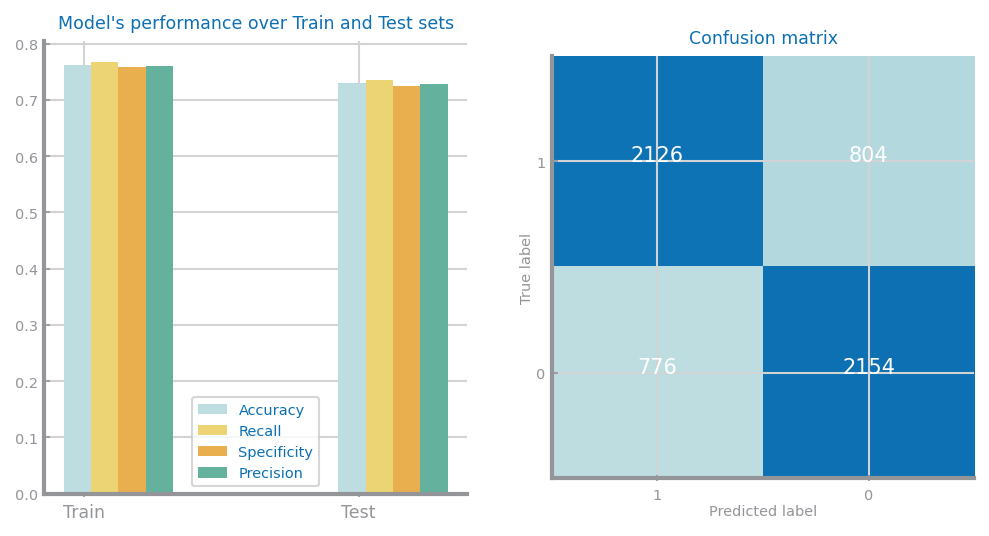

In [25]:
undersample_range = [x*0.1 for x in range(11)]
oversample_range = [x*0.1 for x in range(11)]
clf = BernoulliNB()
best = [[],[],[],[]]
best_acc = 0
under_fact = 0
over_fact = 0
for undersample in undersample_range:
    for oversample in oversample_range:
        total=[0,0,0,0]
        total_trnY = []
        total_tstY = []
        total_prd_trn = []
        total_prd_tst = []
        for ix in range(100):
            trnX, tstX, trnY, tstY = split_balanced(Xz, y, 0.7)
            balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
            for yi in balanceY:
                total_trnY.append(yi)
            for yi in tstY:
                total_tstY.append(yi)
            clf.fit(balanceX, balanceY)
            prd_trn = clf.predict(balanceX)
            prd_tst = clf.predict(tstX)
            for prdi in prd_trn:
                total_prd_trn.append(prdi)
            for prdi in prd_tst:
                total_prd_tst.append(prdi)
            cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
            tn, fp, fn, tp = cnf_mtx_tst.ravel()
            total[0]+=tp
            total[1]+=tn
            total[2]+=fp
            total[3]+=fn


        avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

        if avg_scores > best_acc:
            best[0] = copy.deepcopy(total_trnY)
            best[1] = copy.deepcopy(total_tstY)
            best[2] = copy.deepcopy(total_prd_trn)
            best[3] = copy.deepcopy(total_prd_tst)
            under_fact = undersample
            over_fact = oversample
            best_acc = avg_scores

print(under_fact,over_fact)
ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

Finding best **balancing technique** (UnderSample, OverSample or a mix of both) for both **scaling techniques** (either Z-score or MinMax):
    -  Multinomial Naive Bayes (MinMax only since multinomial cannot take negative values)
        -  Accuracy: 72% | Recall: 74% | Specificity: 69% | Precision: 70% (MinMax w/ Undersample)
    -  Gaussian Naive Bayes
        -  Accuracy: 76% | Recall: 87% | Specificity: 65% | Precision: 71% (MinMax w/ 0.4 Undersample and 1.0 Oversample)
        -  Accuracy: 75% | Recall: 85% | Specificity: 64% | Precision: 71% (Z-Score w/ Undersample)
    -  Bernoulli Naive Bayes (almost as bad as choosing randomly)
        -  Accuracy: 50% | Recall: 97% | Specificity: 3% | Precision: 50% (MinMax w/ 0.4 Undersample and 1.0 Oversample)
        -  Accuracy: 73% | Recall: 74% | Specificity: 73% | Precision: 73% (Z-Score w/ Undersample)
**Once again, the best results were obtained with Gaussian NB with MinMax having 1% more accuracy than Z-Score (76% x 75%) and 1% more F1-Score (78% x 77%).**

# Scaling w/ outliers removal

## Outliers Removal

In [122]:
from numpy import percentile
def remove_outliers(dataX, target, threshold):
    data_rows = [0 for ix, row in data.iterrows()]
    outliers_num = 0
    rows_to_drop=set()
    data_features = [[] for ix in range(len(dataX[0]))]
    for ix in range(len(dataX[0])):
        for iy in range(len(dataX)):
            data_features[ix].append(dataX[iy][ix])
    for ix in range(len(data_features)):
        val_max = max(data_features[ix])
        val_min = min(data_features[ix])
    #     print(val_max)
    #     print(val_min)
        quartiles = percentile(data_features[ix], [25, 50, 75])
    #     print (quartiles)

        iqr = quartiles[2] - quartiles[0]

        lower_val_acceptable = quartiles[0] - 1.5*iqr
        max_val_acceptable = quartiles[2] + 1.5*iqr

    #     print (lower_val_aceptable)
    #     print (max_val_aceptable)


        if val_max > max_val_acceptable or val_min < lower_val_acceptable:
            count=0
            for ele in data_features[ix]:
                if ele > max_val_acceptable or ele < lower_val_acceptable:
                    data_rows[count]+=1
                    if data_rows[count] > threshold:
                        outliers_num+=1
                        rows_to_drop.add(count)
                count+=1
                
    clean_data = [[] for ix in range(len(data_features[0])-len(rows_to_drop))]
    clean_target = []
    
    new_row = 0
    for ix in range(len(data_features[0])):
        if ix not in rows_to_drop:
            for iy in range(len(data_features)):
                clean_data[new_row].append(data_features[iy][ix])
            clean_target.append(target[new_row])
            new_row+=1
            
    return clean_data, clean_target

In [8]:
data: pd.DataFrame = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv')
target = 'DEATH_EVENT'

### Multinomial

0.1 0.2
Confusion Matrix Test
TruePositives:  2183
FalsePositives:  867
TrueNegatives:  1982
FalseNegatives:  666
0.0 0.9
Confusion Matrix Test
TruePositives:  1560
FalsePositives:  688
TrueNegatives:  2230
FalseNegatives:  1358
0.0 0.9
Confusion Matrix Test
TruePositives:  1296
FalsePositives:  668
TrueNegatives:  2226
FalseNegatives:  1598


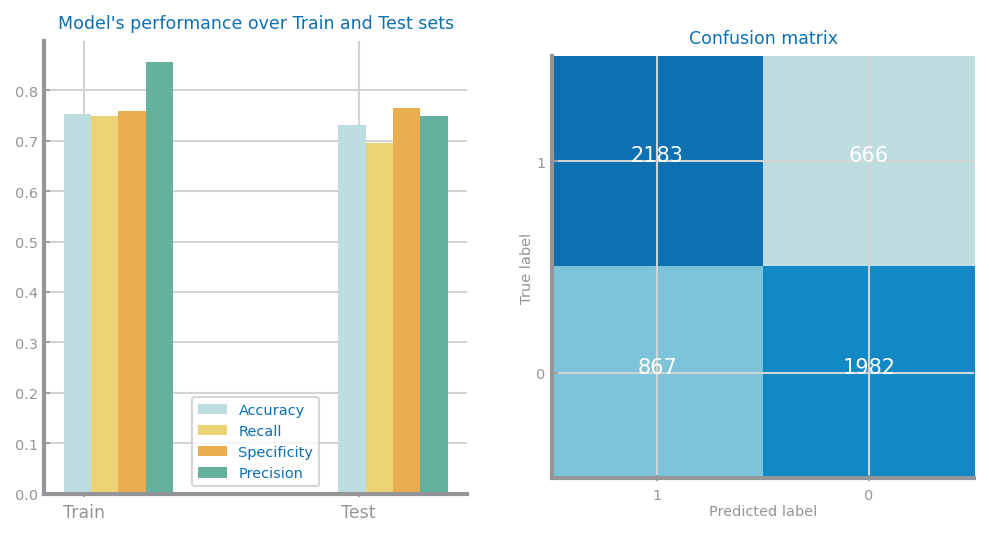

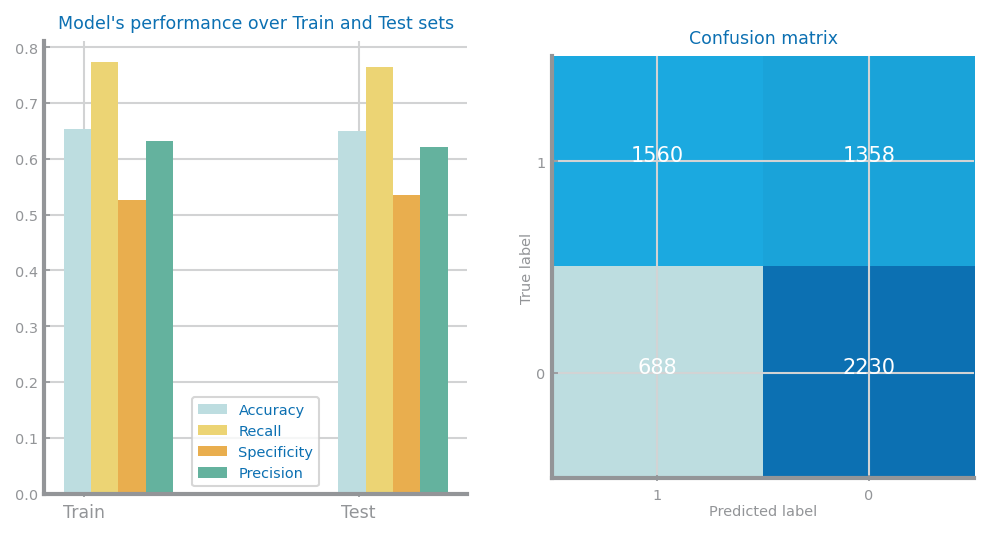

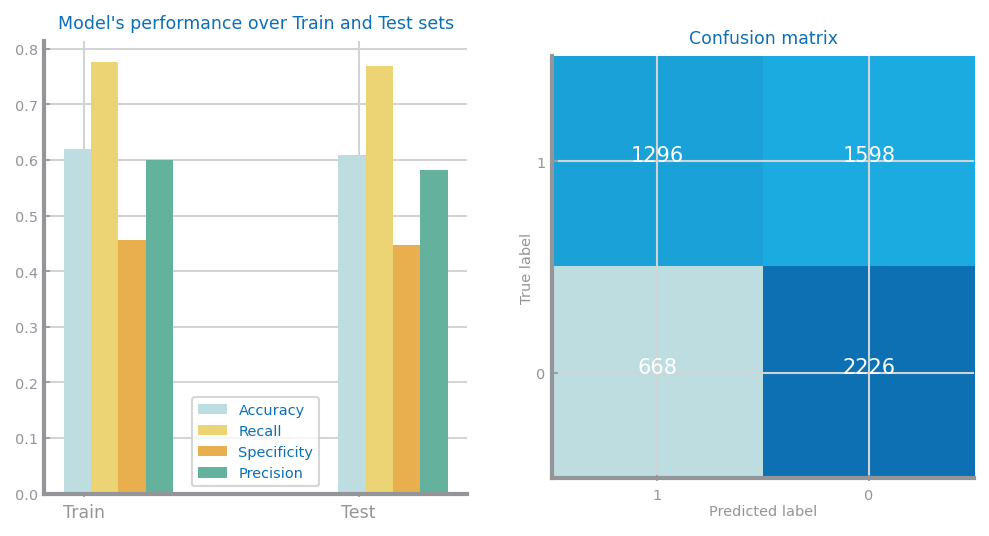

In [9]:
#MultinomialNB cannot compute negative values.
best_acc = 0
under_fact = 0
over_fact = 0
threshold_fact = 0
for threshold in range(0,3):
    
    undersample_range = [x*0.1 for x in range(11)]
    oversample_range = [x*0.1 for x in range(11)]
    clf = MultinomialNB()
    best = [[],[],[],[]]
    best_acc = 0
    under_fact = 0
    over_fact = 0
    for undersample in undersample_range:
        for oversample in oversample_range:
            total=[0,0,0,0]
            total_trnY = []
            total_tstY = []
            total_prd_trn = []
            total_prd_tst = []
            for ix in range(100):
                trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
                X_clean, y_clean = remove_outliers(trnX, trnY,threshold)
                trnX: np.ndarray = X_clean.values
                trnY: np.ndarray = y_clean.values
                balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
                for yi in balanceY:
                    total_trnY.append(yi)
                for yi in tstY:
                    total_tstY.append(yi)
                clf.fit(balanceX, balanceY)
                prd_trn = clf.predict(balanceX)
                prd_tst = clf.predict(tstX)
                for prdi in prd_trn:
                    total_prd_trn.append(prdi)
                for prdi in prd_tst:
                    total_prd_tst.append(prdi)
                cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
                tn, fp, fn, tp = cnf_mtx_tst.ravel()
                total[0]+=tp
                total[1]+=tn
                total[2]+=fp
                total[3]+=fn


            avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

            if avg_scores > best_acc:
                best[0] = copy.deepcopy(total_trnY)
                best[1] = copy.deepcopy(total_tstY)
                best[2] = copy.deepcopy(total_prd_trn)
                best[3] = copy.deepcopy(total_prd_tst)
                under_fact = undersample
                over_fact = oversample
                best_acc = avg_scores

    print(under_fact,over_fact)
    ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

### Multinomial MinMax

0.0 1.0
Confusion Matrix Test
TruePositives:  1387
FalsePositives:  1313
TrueNegatives:  1571
FalseNegatives:  1497
0.8 0.8
Confusion Matrix Test
TruePositives:  1347
FalsePositives:  989
TrueNegatives:  1812
FalseNegatives:  1454
0.2 1.0
Confusion Matrix Test
TruePositives:  1841
FalsePositives:  629
TrueNegatives:  2193
FalseNegatives:  981


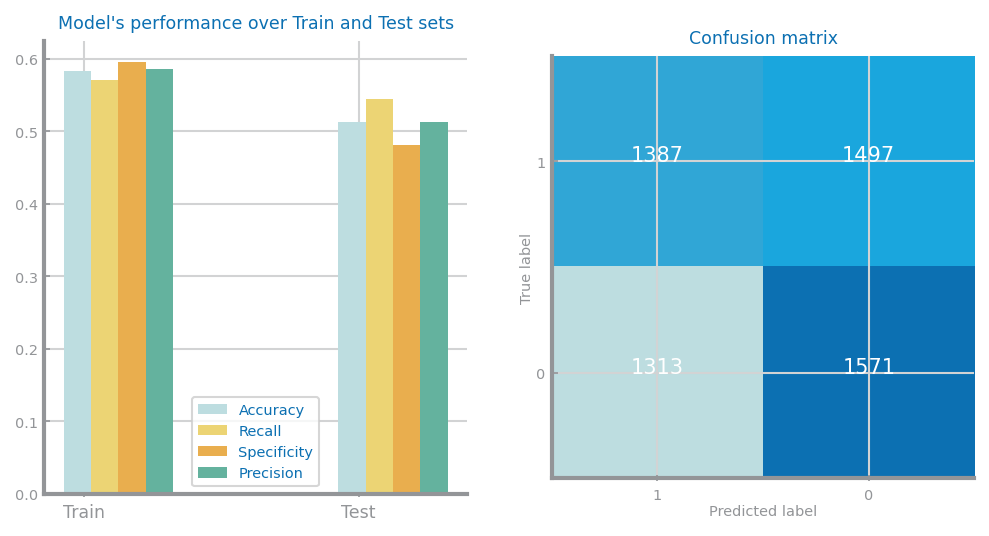

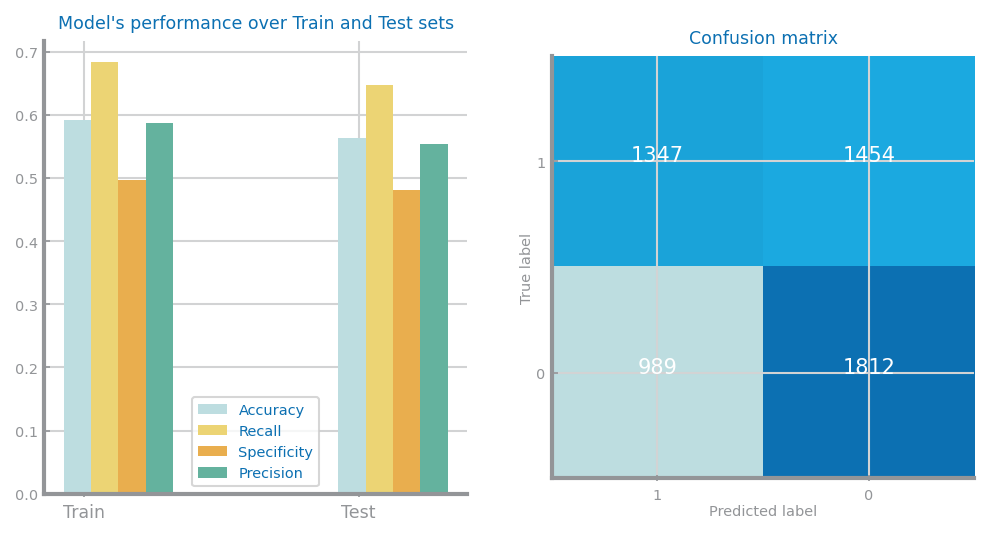

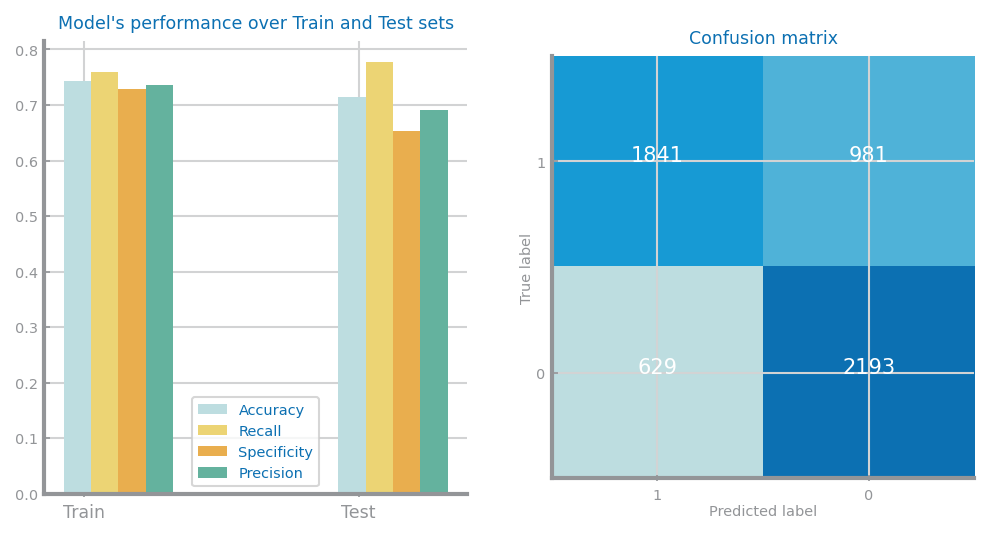

In [123]:
#MultinomialNB cannot compute negative values.
best_acc = 0
under_fact = 0
over_fact = 0
threshold_fact = 0
for threshold in range(0,3):
    
    undersample_range = [x*0.1 for x in range(11)]
    oversample_range = [x*0.1 for x in range(11)]
    clf = MultinomialNB()
    best = [[],[],[],[]]
    best_acc = 0
    under_fact = 0
    over_fact = 0
    for undersample in undersample_range:
        for oversample in oversample_range:
            total=[0,0,0,0]
            total_trnY = []
            total_tstY = []
            total_prd_trn = []
            total_prd_tst = []
            for ix in range(100):
                trnX, tstX, trnY, tstY = split_balanced(XmM, y, 0.7)
                trnX, trnY = remove_outliers(trnX, trnY,threshold)
                balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
                for yi in balanceY:
                    total_trnY.append(yi)
                for yi in tstY:
                    total_tstY.append(yi)
                clf.fit(balanceX, balanceY)
                prd_trn = clf.predict(balanceX)
                prd_tst = clf.predict(tstX)
                for prdi in prd_trn:
                    total_prd_trn.append(prdi)
                for prdi in prd_tst:
                    total_prd_tst.append(prdi)
                cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
                tn, fp, fn, tp = cnf_mtx_tst.ravel()
                total[0]+=tp
                total[1]+=tn
                total[2]+=fp
                total[3]+=fn


            avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

            if avg_scores > best_acc:
                best[0] = copy.deepcopy(total_trnY)
                best[1] = copy.deepcopy(total_tstY)
                best[2] = copy.deepcopy(total_prd_trn)
                best[3] = copy.deepcopy(total_prd_tst)
                under_fact = undersample
                over_fact = oversample
                best_acc = avg_scores

    print(under_fact,over_fact)
    ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

**Best Multinomial NB results** (with outliers removal at 0 threshold, no scaling and no balancing):
    -  Accuracy: 73% | Recall: 70% | Specificity: 77% | Precision: 75% (F1-Score: 72%)

### Gaussian 

0.0 0.4
Confusion Matrix Test
TruePositives:  749
FalsePositives:  596
TrueNegatives:  2243
FalseNegatives:  2090
1.0 0.7000000000000001
Confusion Matrix Test
TruePositives:  1694
FalsePositives:  1065
TrueNegatives:  1728
FalseNegatives:  1099
1.0 0.5
Confusion Matrix Test
TruePositives:  2132
FalsePositives:  473
TrueNegatives:  2423
FalseNegatives:  764


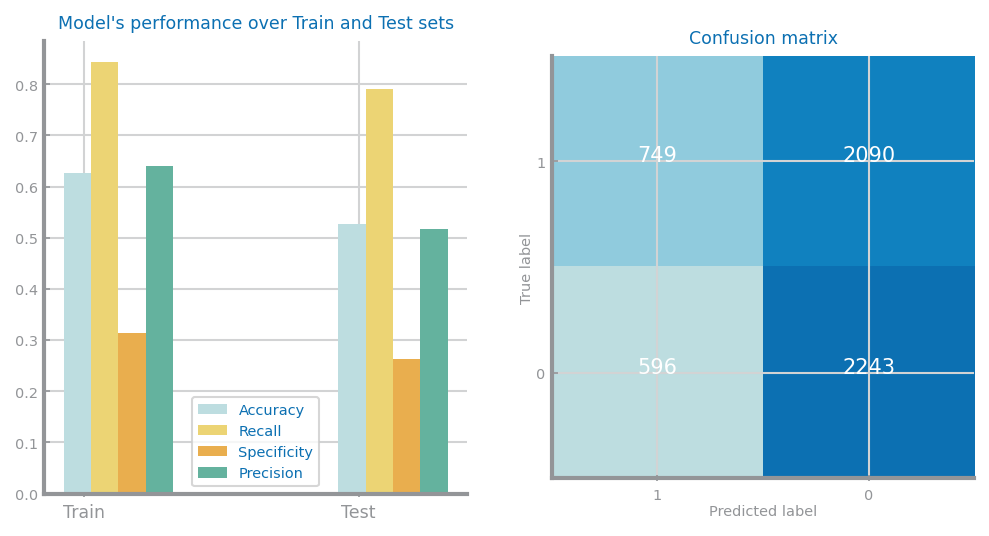

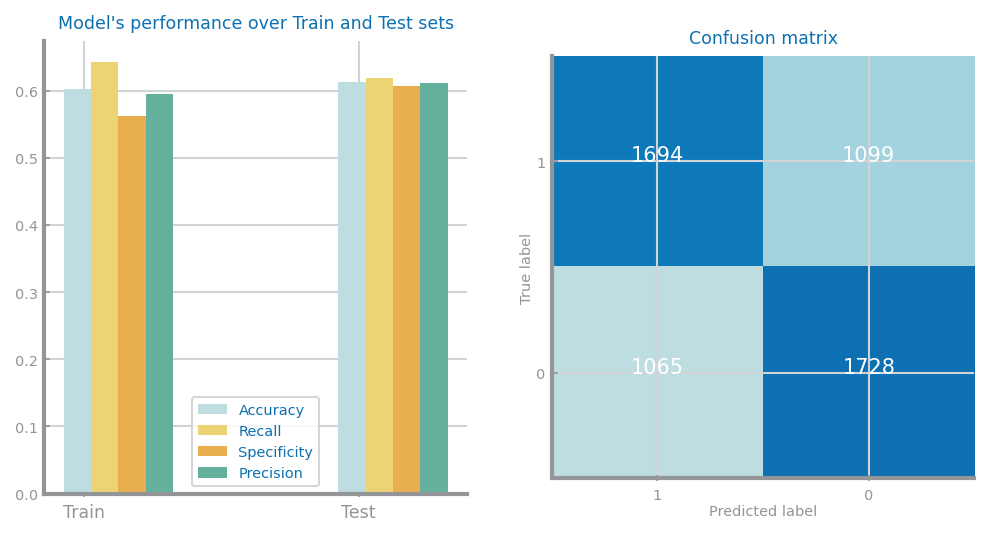

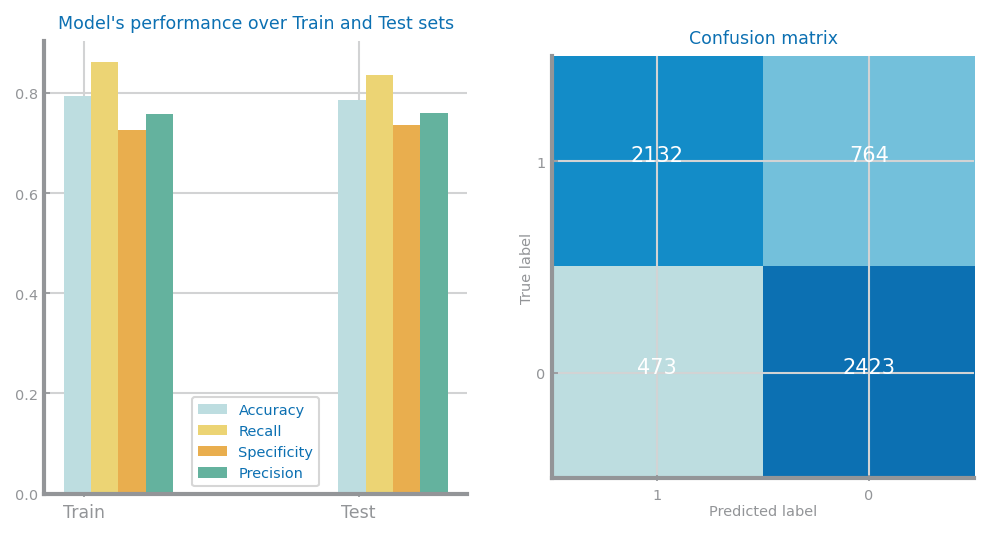

In [124]:
#MultinomialNB cannot compute negative values.
best_acc = 0
under_fact = 0
over_fact = 0
threshold_fact = 0
for threshold in range(0,3):
    
    undersample_range = [x*0.1 for x in range(11)]
    oversample_range = [x*0.1 for x in range(11)]
    clf = GaussianNB()
    best = [[],[],[],[]]
    best_acc = 0
    under_fact = 0
    over_fact = 0
    for undersample in undersample_range:
        for oversample in oversample_range:
            total=[0,0,0,0]
            total_trnY = []
            total_tstY = []
            total_prd_trn = []
            total_prd_tst = []
            for ix in range(100):
                trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
                trnX, trnY = remove_outliers(trnX, trnY,threshold)
                balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
                for yi in balanceY:
                    total_trnY.append(yi)
                for yi in tstY:
                    total_tstY.append(yi)
                clf.fit(balanceX, balanceY)
                prd_trn = clf.predict(balanceX)
                prd_tst = clf.predict(tstX)
                for prdi in prd_trn:
                    total_prd_trn.append(prdi)
                for prdi in prd_tst:
                    total_prd_tst.append(prdi)
                cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
                tn, fp, fn, tp = cnf_mtx_tst.ravel()
                total[0]+=tp
                total[1]+=tn
                total[2]+=fp
                total[3]+=fn


            avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

            if avg_scores > best_acc:
                best[0] = copy.deepcopy(total_trnY)
                best[1] = copy.deepcopy(total_tstY)
                best[2] = copy.deepcopy(total_prd_trn)
                best[3] = copy.deepcopy(total_prd_tst)
                under_fact = undersample
                over_fact = oversample
                best_acc = avg_scores

    print(under_fact,over_fact)
    ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

### Gaussian Z-Score

0.0 0.1
Confusion Matrix Test
TruePositives:  857
FalsePositives:  569
TrueNegatives:  2331
FalseNegatives:  2043
1.0 0.8
Confusion Matrix Test
TruePositives:  1507
FalsePositives:  1018
TrueNegatives:  1766
FalseNegatives:  1277
0.7000000000000001 0.8
Confusion Matrix Test
TruePositives:  1817
FalsePositives:  387
TrueNegatives:  2471
FalseNegatives:  1041


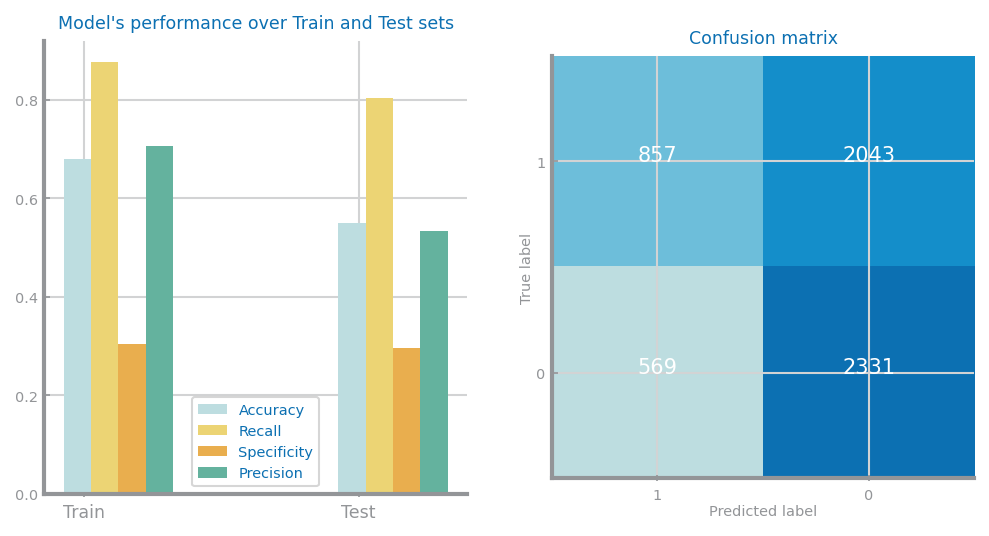

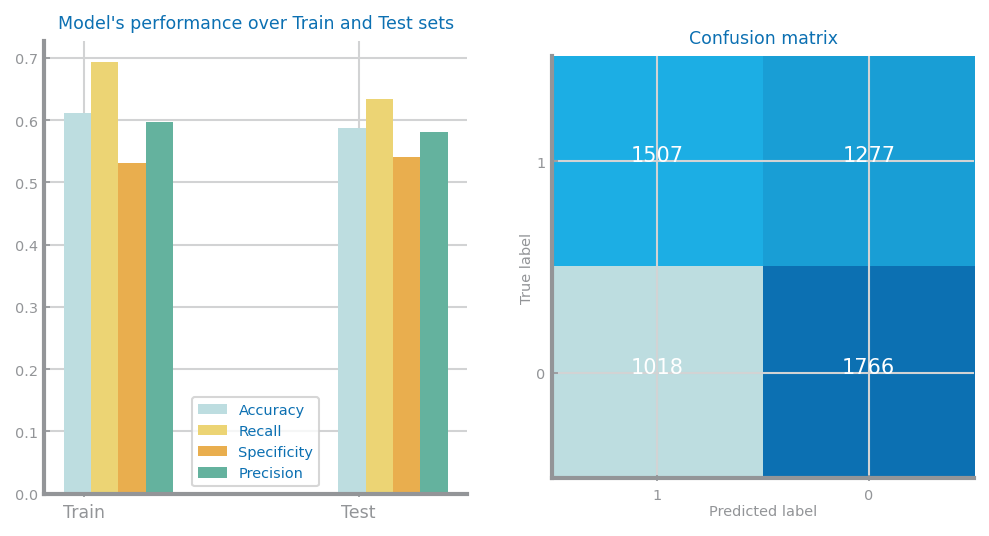

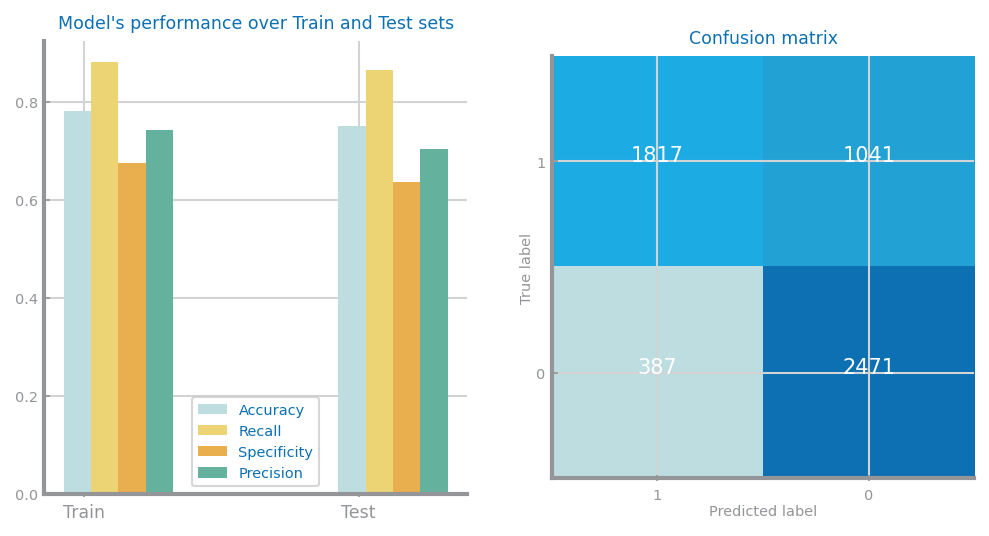

In [129]:
#MultinomialNB cannot compute negative values.
best_acc = 0
under_fact = 0
over_fact = 0
threshold_fact = 0
for threshold in range(0,3):
        
    undersample_range = [x*0.1 for x in range(11)]
    oversample_range = [x*0.1 for x in range(11)]
    clf = GaussianNB()
    best = [[],[],[],[]]
    best_acc = 0
    under_fact = 0
    over_fact = 0
    for undersample in undersample_range:
        for oversample in oversample_range:
            total=[0,0,0,0]
            total_trnY = []
            total_tstY = []
            total_prd_trn = []
            total_prd_tst = []
            for ix in range(100):
                trnX, tstX, trnY, tstY = split_balanced(Xz, y, 0.7)
                trnX, trnY = remove_outliers(trnX, trnY,threshold)
                balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
                for yi in balanceY:
                    total_trnY.append(yi)
                for yi in tstY:
                    total_tstY.append(yi)
                clf.fit(balanceX, balanceY)
                prd_trn = clf.predict(balanceX)
                prd_tst = clf.predict(tstX)
                for prdi in prd_trn:
                    total_prd_trn.append(prdi)
                for prdi in prd_tst:
                    total_prd_tst.append(prdi)
                cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
                tn, fp, fn, tp = cnf_mtx_tst.ravel()
                total[0]+=tp
                total[1]+=tn
                total[2]+=fp
                total[3]+=fn


            avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

            if avg_scores > best_acc:
                best[0] = copy.deepcopy(total_trnY)
                best[1] = copy.deepcopy(total_tstY)
                best[2] = copy.deepcopy(total_prd_trn)
                best[3] = copy.deepcopy(total_prd_tst)
                under_fact = undersample
                over_fact = oversample
                best_acc = avg_scores

    print(under_fact,over_fact)
    ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

### Gaussian MinMax

0.0 0.0
Confusion Matrix Test
TruePositives:  737
FalsePositives:  512
TrueNegatives:  2381
FalseNegatives:  2156
0.0 0.9
Confusion Matrix Test
TruePositives:  1544
FalsePositives:  991
TrueNegatives:  1910
FalseNegatives:  1357
1.0 0.0
Confusion Matrix Test
TruePositives:  1795
FalsePositives:  393
TrueNegatives:  2424
FalseNegatives:  1022


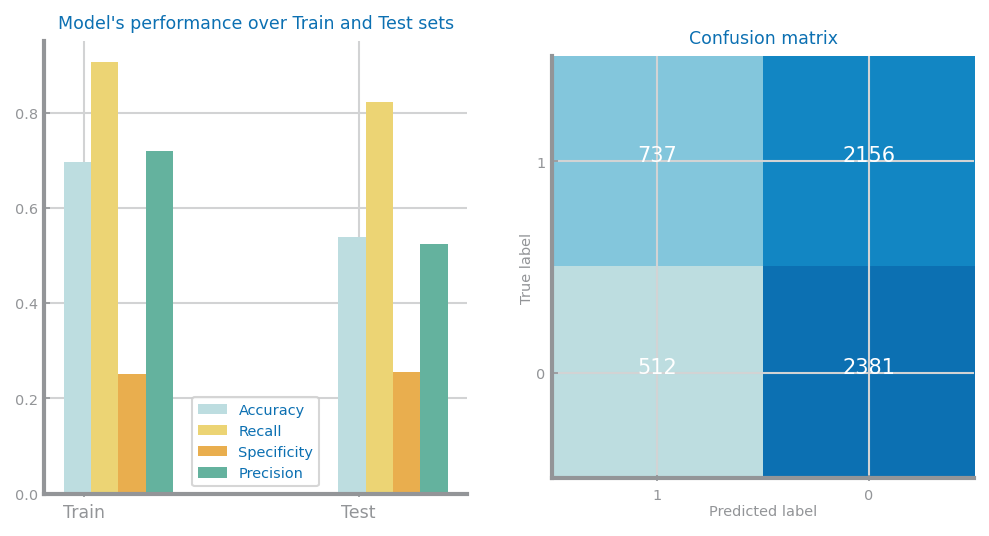

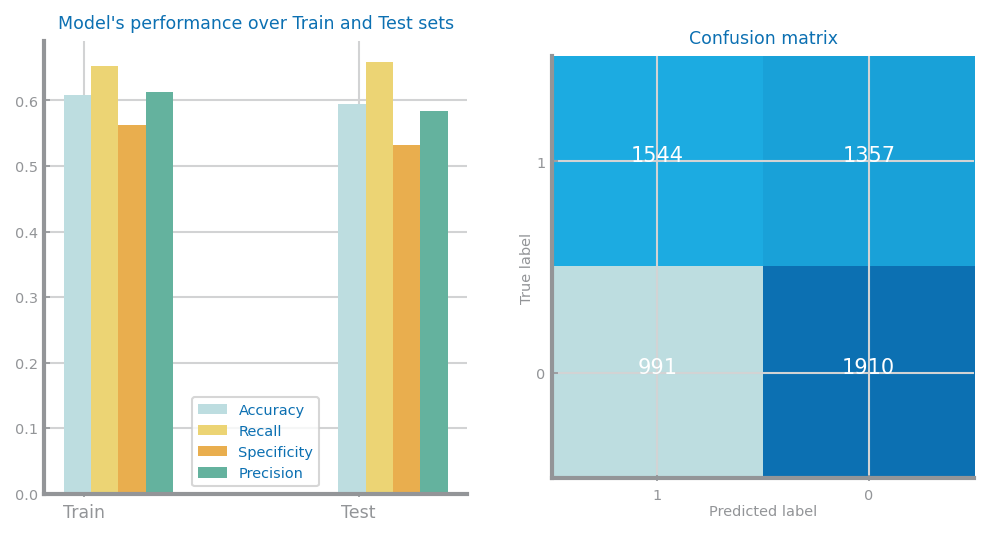

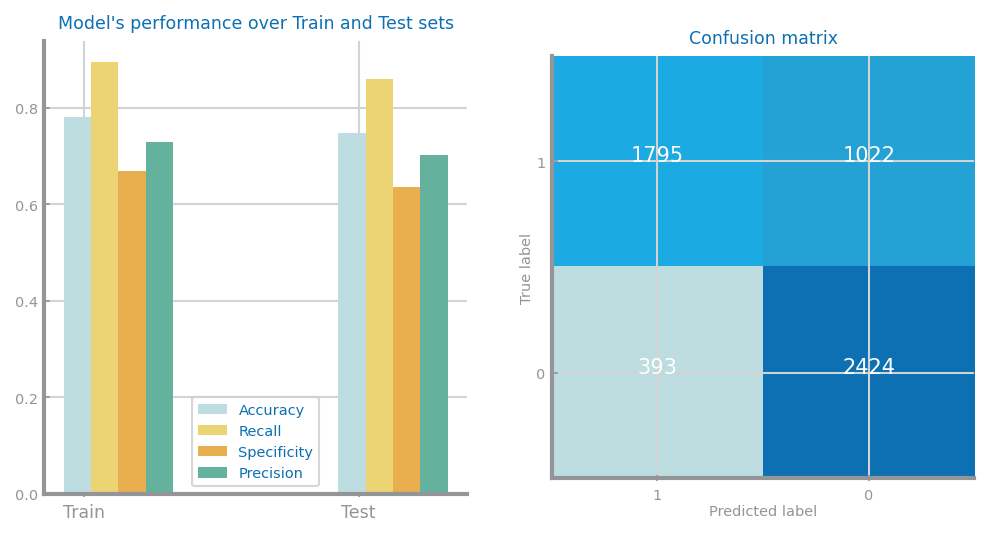

In [125]:
best_acc = 0
under_fact = 0
over_fact = 0
threshold_fact = 0
for threshold in range(0,3):
    
    undersample_range = [x*0.1 for x in range(11)]
    oversample_range = [x*0.1 for x in range(11)]
    clf = GaussianNB()
    best = [[],[],[],[]]
    best_acc = 0
    under_fact = 0
    over_fact = 0
    for undersample in undersample_range:
        for oversample in oversample_range:
            total=[0,0,0,0]
            total_trnY = []
            total_tstY = []
            total_prd_trn = []
            total_prd_tst = []
            for ix in range(100):
                trnX, tstX, trnY, tstY = split_balanced(XmM, y, 0.7)
                trnX, trnY = remove_outliers(trnX, trnY,threshold)
                balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
                for yi in balanceY:
                    total_trnY.append(yi)
                for yi in tstY:
                    total_tstY.append(yi)
                clf.fit(balanceX, balanceY)
                prd_trn = clf.predict(balanceX)
                prd_tst = clf.predict(tstX)
                for prdi in prd_trn:
                    total_prd_trn.append(prdi)
                for prdi in prd_tst:
                    total_prd_tst.append(prdi)
                cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
                tn, fp, fn, tp = cnf_mtx_tst.ravel()
                total[0]+=tp
                total[1]+=tn
                total[2]+=fp
                total[3]+=fn


            avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

            if avg_scores > best_acc:
                best[0] = copy.deepcopy(total_trnY)
                best[1] = copy.deepcopy(total_tstY)
                best[2] = copy.deepcopy(total_prd_trn)
                best[3] = copy.deepcopy(total_prd_tst)
                under_fact = undersample
                over_fact = oversample
                best_acc = avg_scores

    print(under_fact,over_fact)
    ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

**Best Gaussian NB results** (without outliers removal and no scaling, with Undersampling):
    -  Accuracy: 79% | Recall: 84% | Specificity: 74% | Precision: 76% (F1-Score: 80%)

### Bernoulli

1.0 0.9
Confusion Matrix Test
TruePositives:  1495
FalsePositives:  1424
TrueNegatives:  1407
FalseNegatives:  1336
0.7000000000000001 1.0
Confusion Matrix Test
TruePositives:  1413
FalsePositives:  1332
TrueNegatives:  1499
FalseNegatives:  1418
0.5 0.2
Confusion Matrix Test
TruePositives:  200
FalsePositives:  196
TrueNegatives:  2639
FalseNegatives:  2635


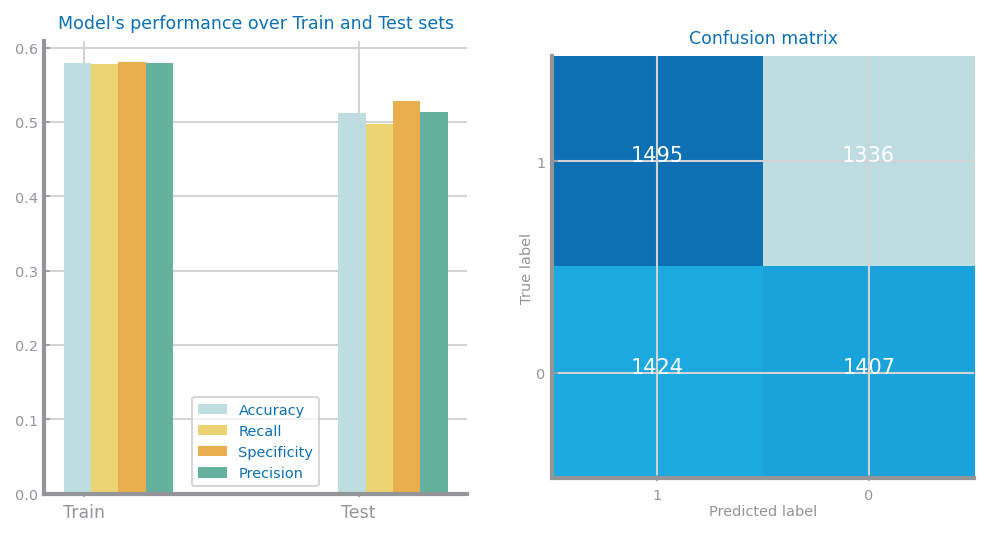

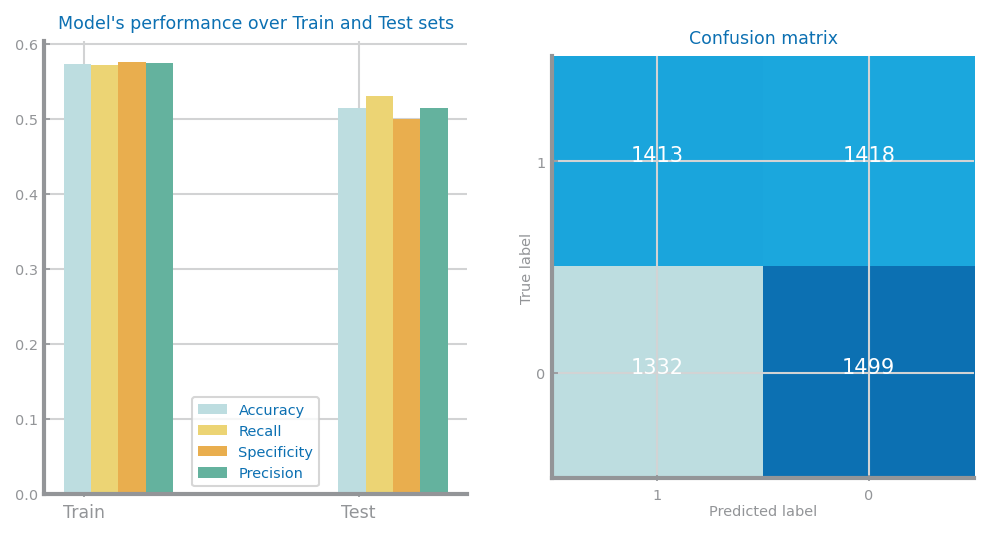

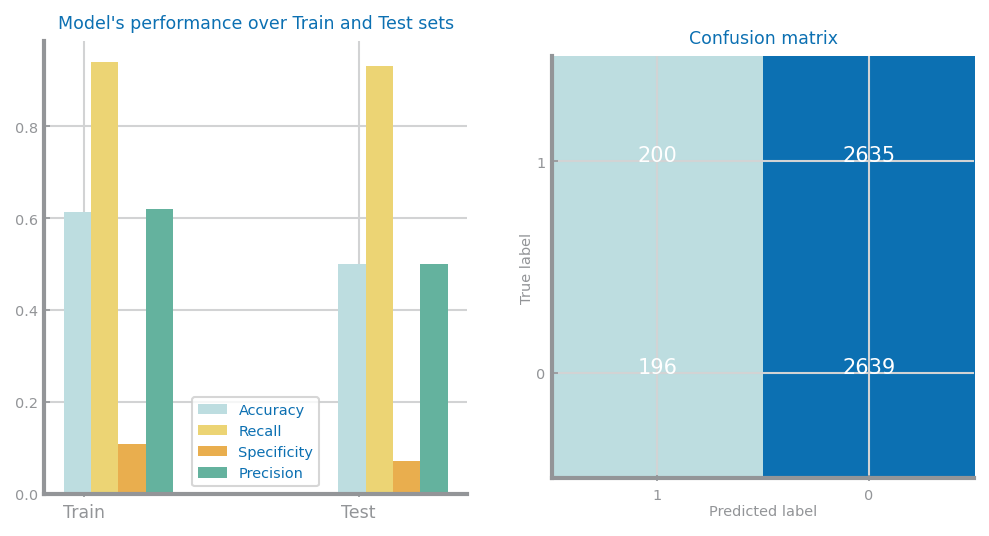

In [126]:
best_acc = 0
under_fact = 0
over_fact = 0
threshold_fact = 0
for threshold in range(0,3):
    
    undersample_range = [x*0.1 for x in range(11)]
    oversample_range = [x*0.1 for x in range(11)]
    clf = BernoulliNB()
    best = [[],[],[],[]]
    best_acc = 0
    under_fact = 0
    over_fact = 0
    for undersample in undersample_range:
        for oversample in oversample_range:
            total=[0,0,0,0]
            total_trnY = []
            total_tstY = []
            total_prd_trn = []
            total_prd_tst = []
            for ix in range(100):
                trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
                trnX, trnY = remove_outliers(trnX, trnY,threshold)
                balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
                for yi in balanceY:
                    total_trnY.append(yi)
                for yi in tstY:
                    total_tstY.append(yi)
                clf.fit(balanceX, balanceY)
                prd_trn = clf.predict(balanceX)
                prd_tst = clf.predict(tstX)
                for prdi in prd_trn:
                    total_prd_trn.append(prdi)
                for prdi in prd_tst:
                    total_prd_tst.append(prdi)
                cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
                tn, fp, fn, tp = cnf_mtx_tst.ravel()
                total[0]+=tp
                total[1]+=tn
                total[2]+=fp
                total[3]+=fn


            avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

            if avg_scores > best_acc:
                best[0] = copy.deepcopy(total_trnY)
                best[1] = copy.deepcopy(total_tstY)
                best[2] = copy.deepcopy(total_prd_trn)
                best[3] = copy.deepcopy(total_prd_tst)
                under_fact = undersample
                over_fact = oversample
                best_acc = avg_scores

    print(under_fact,over_fact)
    ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

### Bernoulli Z-Score

0.0 0.8
Confusion Matrix Test
TruePositives:  1166
FalsePositives:  1044
TrueNegatives:  1820
FalseNegatives:  1698
0.8 0.8
Confusion Matrix Test
TruePositives:  1627
FalsePositives:  1080
TrueNegatives:  1764
FalseNegatives:  1217
0.0 1.0
Confusion Matrix Test
TruePositives:  2033
FalsePositives:  755
TrueNegatives:  2061
FalseNegatives:  783


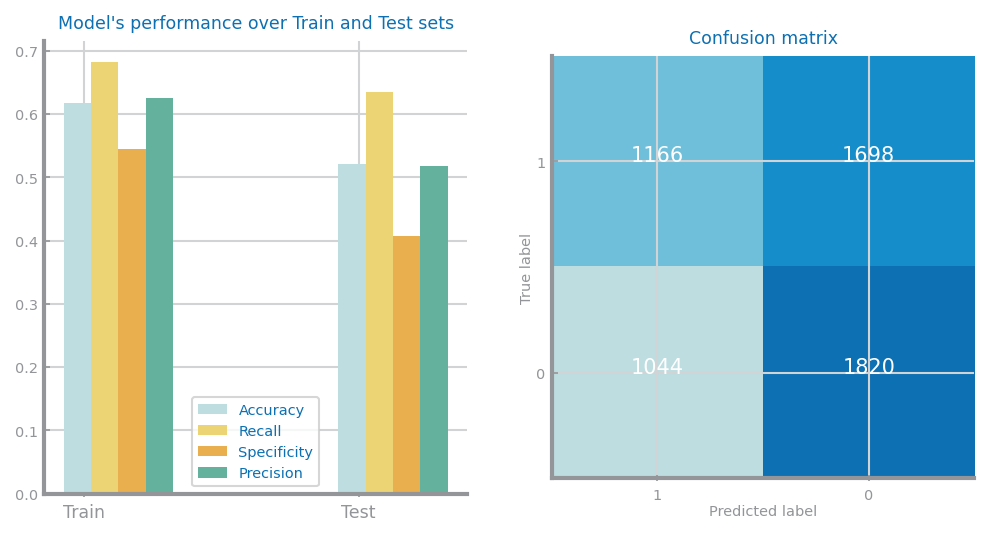

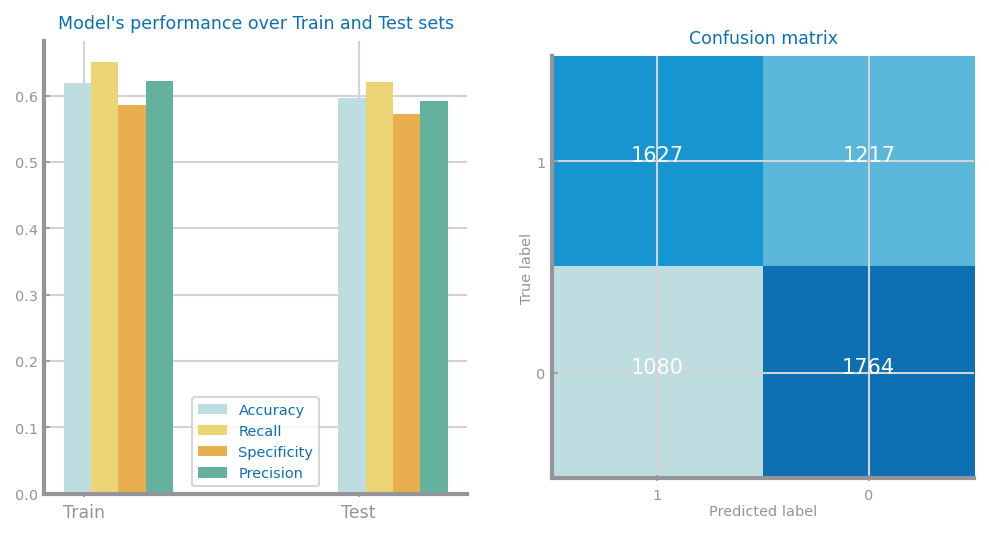

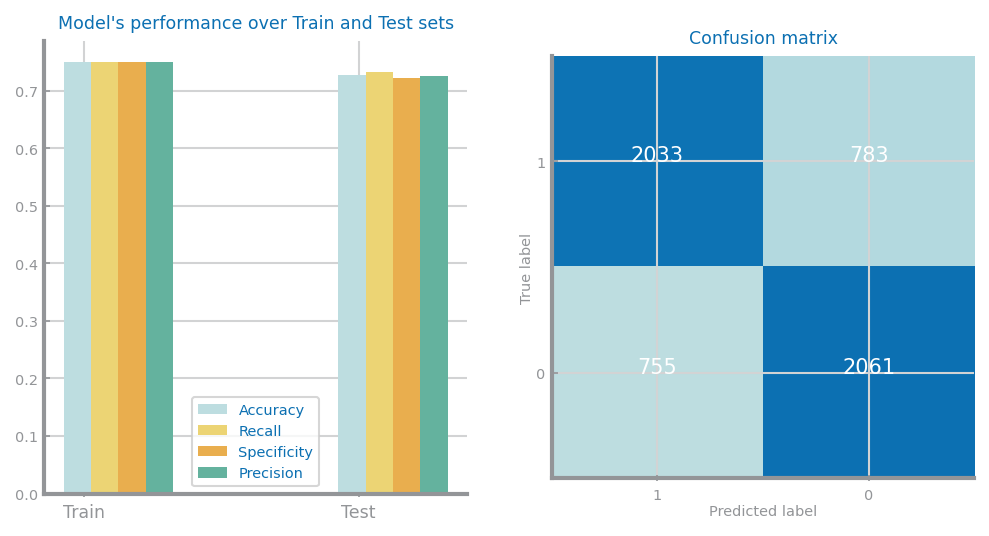

In [127]:
best_acc = 0
under_fact = 0
over_fact = 0
threshold_fact = 0
for threshold in range(0,3):
    
    undersample_range = [x*0.1 for x in range(11)]
    oversample_range = [x*0.1 for x in range(11)]
    clf = BernoulliNB()
    best = [[],[],[],[]]
    best_acc = 0
    under_fact = 0
    over_fact = 0
    for undersample in undersample_range:
        for oversample in oversample_range:
            total=[0,0,0,0]
            total_trnY = []
            total_tstY = []
            total_prd_trn = []
            total_prd_tst = []
            for ix in range(100):
                trnX, tstX, trnY, tstY = split_balanced(Xz, y, 0.7)
                trnX, trnY = remove_outliers(trnX, trnY,threshold)
                balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
                for yi in balanceY:
                    total_trnY.append(yi)
                for yi in tstY:
                    total_tstY.append(yi)
                clf.fit(balanceX, balanceY)
                prd_trn = clf.predict(balanceX)
                prd_tst = clf.predict(tstX)
                for prdi in prd_trn:
                    total_prd_trn.append(prdi)
                for prdi in prd_tst:
                    total_prd_tst.append(prdi)
                cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
                tn, fp, fn, tp = cnf_mtx_tst.ravel()
                total[0]+=tp
                total[1]+=tn
                total[2]+=fp
                total[3]+=fn


            avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

            if avg_scores > best_acc:
                best[0] = copy.deepcopy(total_trnY)
                best[1] = copy.deepcopy(total_tstY)
                best[2] = copy.deepcopy(total_prd_trn)
                best[3] = copy.deepcopy(total_prd_tst)
                under_fact = undersample
                over_fact = oversample
                best_acc = avg_scores

    print(under_fact,over_fact)
    ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

### Bernoulli MinMax

0.6000000000000001 0.7000000000000001
Confusion Matrix Test
TruePositives:  1152
FalsePositives:  1056
TrueNegatives:  1803
FalseNegatives:  1707
0.4 0.9
Confusion Matrix Test
TruePositives:  1237
FalsePositives:  1159
TrueNegatives:  1687
FalseNegatives:  1609
0.8 0.7000000000000001
Confusion Matrix Test
TruePositives:  1201
FalsePositives:  1169
TrueNegatives:  1738
FalseNegatives:  1706


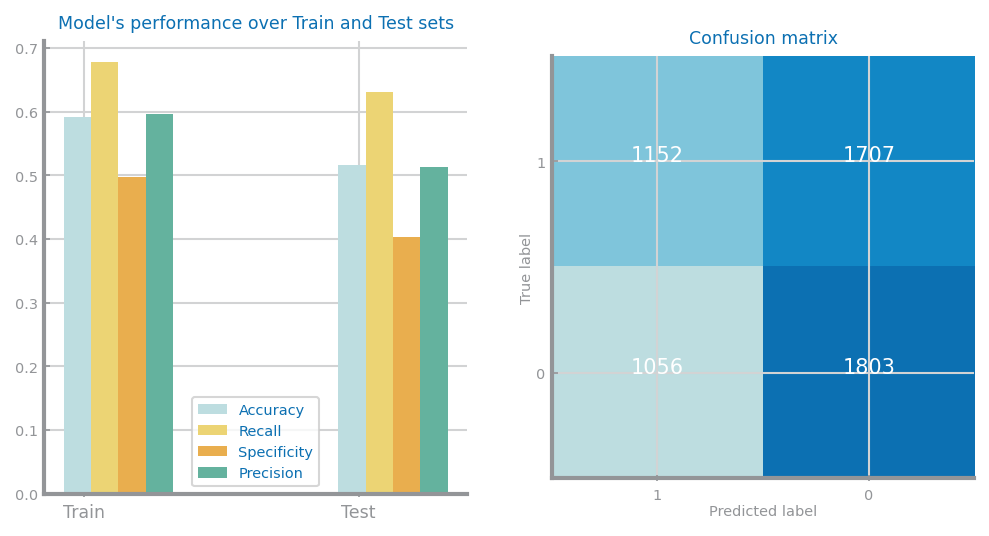

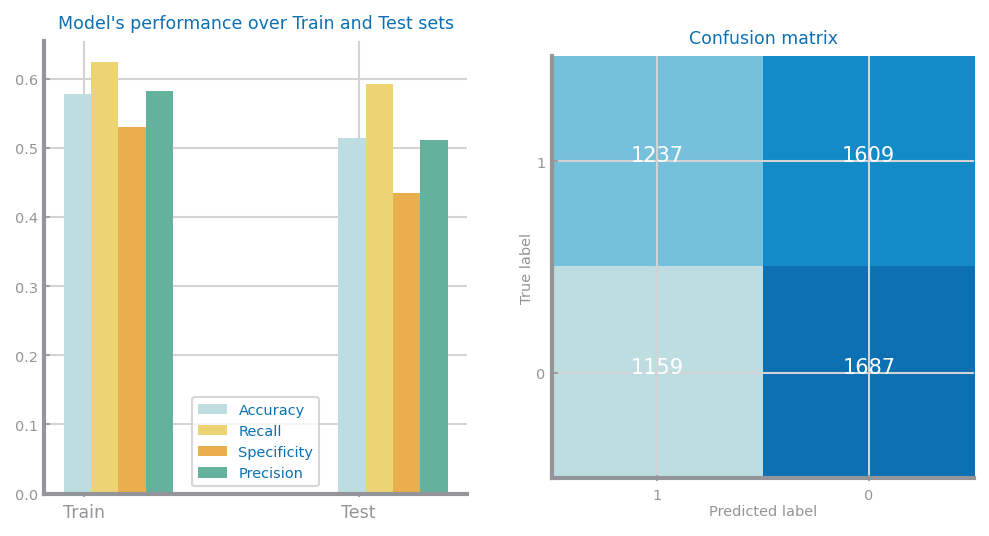

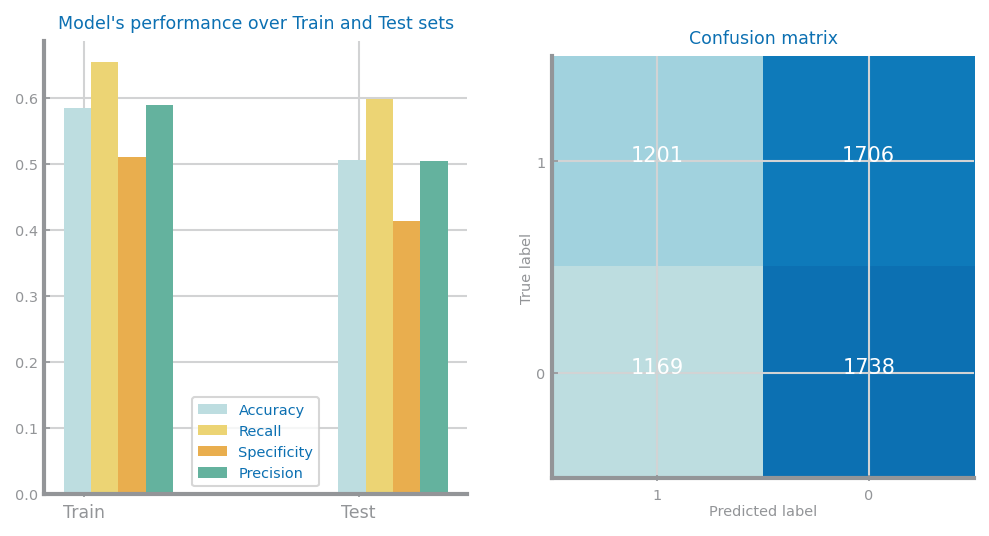

In [128]:
best_acc = 0
under_fact = 0
over_fact = 0
threshold_fact = 0
for threshold in range(0,3):
    
    undersample_range = [x*0.1 for x in range(11)]
    oversample_range = [x*0.1 for x in range(11)]
    clf = BernoulliNB()
    best = [[],[],[],[]]
    best_acc = 0
    under_fact = 0
    over_fact = 0
    for undersample in undersample_range:
        for oversample in oversample_range:
            total=[0,0,0,0]
            total_trnY = []
            total_tstY = []
            total_prd_trn = []
            total_prd_tst = []
            for ix in range(100):
                trnX, tstX, trnY, tstY = split_balanced(XmM, y, 0.7)
                trnX, trnY = remove_outliers(trnX, trnY,threshold)
                balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
                for yi in balanceY:
                    total_trnY.append(yi)
                for yi in tstY:
                    total_tstY.append(yi)
                clf.fit(balanceX, balanceY)
                prd_trn = clf.predict(balanceX)
                prd_tst = clf.predict(tstX)
                for prdi in prd_trn:
                    total_prd_trn.append(prdi)
                for prdi in prd_tst:
                    total_prd_tst.append(prdi)
                cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
                tn, fp, fn, tp = cnf_mtx_tst.ravel()
                total[0]+=tp
                total[1]+=tn
                total[2]+=fp
                total[3]+=fn


            avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

            if avg_scores > best_acc:
                best[0] = copy.deepcopy(total_trnY)
                best[1] = copy.deepcopy(total_tstY)
                best[2] = copy.deepcopy(total_prd_trn)
                best[3] = copy.deepcopy(total_prd_tst)
                under_fact = undersample
                over_fact = oversample
                best_acc = avg_scores

    print(under_fact,over_fact)
    ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

**Best Bernoulli NB results** (without outliers removal, Z-Score scaling and Oversampling):
    -  Accuracy: 73% | Recall: 73% | Specificity: 72% | Precision: 72% (F1-Score: 72%)

# Overall Analysis Naive Bayes

The best results achieved were using a Gaussian Naive Bayes, without outlier removal, without scaling and using UnderSampling as a balancing technique. The **result** will be replicated below:

Confusion Matrix Test
TruePositives:  20246
FalsePositives:  4587
TrueNegatives:  24019
FalseNegatives:  8360


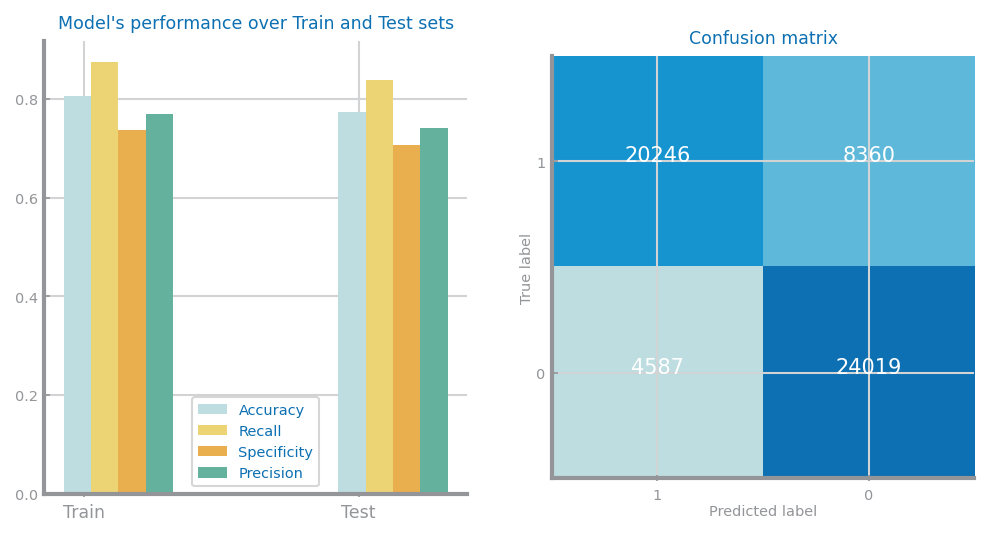

In [133]:
clf = GaussianNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(1000):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    trnX, trnY = remove_outliers(trnX, trnY,3)
    balanceX, balanceY = balancing(trnX, trnY, 1, 0)
    for yi in balanceY:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    clf.fit(balanceX, balanceY)
    prd_trn = clf.predict(balanceX)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)
ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)